In [1]:
import networkx as nx
import utils
import time
import matplotlib.pyplot as plt
import pandas as pd
import Graph_Exploration
import pickle
import Louvain_algo
from cdlib import algorithms
import numpy as np
import random
from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics.cluster import completeness_score

Note: to be able to use all crisp methods, you need to install some additional packages:  {'graph_tool', 'bayanpy', 'infomap', 'wurlitzer'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'ASLPAw', 'pyclustering'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'wurlitzer'}


Load the graphs

In [2]:
def small_G():
    G = nx.Graph()

    # Add nodes
    G.add_node(1)
    G.add_nodes_from([1,2, 3, 4, 5, 6, 7, 8, 9])

    # Add edges
    G.add_edges_from([(1,2),(1, 3),(2,3), (3,6),(3,7),(3,9),(4,5),(4,7),(4,8),(5,7),(5,8),(6,9),(7,8),(8,9)])
    return G
small_graph = small_G()

In [69]:
def email():
    graph = nx.read_edgelist("data/email-Eu-core.txt", nodetype = int)
    s = list(nx.connected_components(graph))
    G = graph.subgraph(s[0])
    return G
email_graph = email()

In [4]:
def citation():
    graph = nx.read_edgelist("data/CA-GrQc.txt", nodetype = int)
    s = list(nx.connected_components(graph))
    G = graph.subgraph(s[0])
    return G
citation_graph = citation()

In [68]:
def deerzer():
    nodes,edges = utils.Load_data("nodes_with_all_communities.csv","data/deezer_europe_edges.csv")
    G = nx.Graph()
    # Adding nodes to the graph
    for _, row in nodes.iterrows():
        node_id = row['id'] 
        features = {key: value for key, value in row.items() if key != 'id'}  # Exclude the ID column
        G.add_node(node_id, **features)

    # Adding edges to the graph
    for _, row in edges.iterrows():
        source = row['node_1']  # Assuming 'source' column contains the source node ID
        target = row['node_2']  # Assuming 'target' column contains the target node ID
        #We can add more features if the edges have features
        G.add_edge(source, target)
    

    return G
deerzer_graph = deerzer()

In [5]:
nodes,edges = utils.Load_data("nodes_with_all_communities.csv","edges without loops.csv")
facebook_graph = utils.Create_Graph(nodes=nodes , edges=edges)

In [60]:
def random_graph(nodes_number):
    return nx.newman_watts_strogatz_graph(nodes_number, 3, 0.9)
g1 = random_graph(15000)
g2 = random_graph(20000)

Time mesurements

In [61]:

def louvain_built_time(G):
    start_time = time.time()
    communities_built = nx.community.louvain_communities(G)
    t = time.time()-start_time
    return t

In [95]:
graphs = [small_graph,citation_graph,facebook_graph,deerzer_graph]

data_dict = {
    'names': ['small_graph','citation_graph','facebook_graph','deerzer'],
    'nodes': [G.number_of_nodes() for G in graphs],
    'edges': [G.number_of_edges() for G in graphs],
    'louvain_built_time': [louvain_built_time(G) for G in graphs]
}
data_dict

{'names': ['small_graph', 'citation_graph', 'facebook_graph', 'deerzer'],
 'nodes': [9, 4158, 22470, 28281],
 'edges': [14, 13428, 170823, 92752],
 'louvain_built_time': [0.0013799667358398438,
  0.3605499267578125,
  3.3719117641448975,
  4.013162851333618]}

In [96]:
def apply_own_time(G):
    start_time = time.time()
    algo = Louvain_algo.Louvain_algo(G)
    com = algo.run()
    t = time.time()-start_time
    return t

In [97]:
data_dict['own_time'] = []
for G in graphs:
    t = apply_own_time(G)
    data_dict['own_time'].append(t)

In [98]:
data_dict

{'names': ['small_graph', 'citation_graph', 'facebook_graph', 'deerzer'],
 'nodes': [9, 4158, 22470, 28281],
 'edges': [14, 13428, 170823, 92752],
 'louvain_built_time': [0.0013799667358398438,
  0.3605499267578125,
  3.3719117641448975,
  4.013162851333618],
 'own_time': [0.0008342266082763672,
  7.0492846965789795,
  101.52633690834045,
  272.91998839378357]}

In [99]:
def apply_Leiden_time(G):
    start_time = time.time()
    coms = algorithms.leiden(G)
    coms = coms.communities
    t = time.time()-start_time
    return t

In [100]:
data_dict['leiden_time'] = []
for G in graphs:
    t = apply_Leiden_time(G)
    data_dict['leiden_time'].append(t)

Visualization runtime

In [101]:
data_dict

{'names': ['small_graph', 'citation_graph', 'facebook_graph', 'deerzer'],
 'nodes': [9, 4158, 22470, 28281],
 'edges': [14, 13428, 170823, 92752],
 'louvain_built_time': [0.0013799667358398438,
  0.3605499267578125,
  3.3719117641448975,
  4.013162851333618],
 'own_time': [0.0008342266082763672,
  7.0492846965789795,
  101.52633690834045,
  272.91998839378357],
 'leiden_time': [0.0016429424285888672,
  0.30012989044189453,
  1.9557089805603027,
  1.713698148727417]}

In [102]:
df = pd.DataFrame(data_dict)

In [105]:
def plot_G(x_axis,y1,y2,y3,title):
    plt.scatter(df[x_axis], df[y1])
    plt.scatter(df[x_axis], df[y2])
    plt.scatter(df[x_axis], df[y3])
    plt.plot(df[x_axis], df[y1])
    plt.plot(df[x_axis], df[y2])
    plt.plot(df[x_axis], df[y3])
    for i, txt in enumerate(df['names']):
        plt.annotate(txt, (df[x_axis][i], df[y2][i]), textcoords="offset points", xytext=(0,10), ha='center')
    plt.xlabel(x_axis)
    plt.ylabel('time in s')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

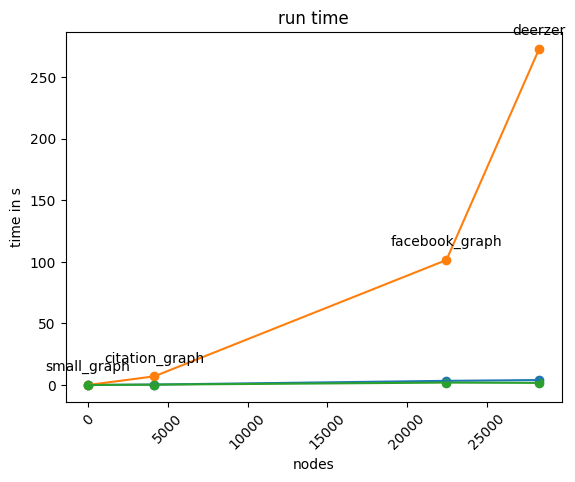

In [106]:
plot_G('nodes','louvain_built_time','own_time','leiden_time','run time')

In [110]:
def plot_bar(y1,y2,y3,title):
    fig, ax = plt.subplots(layout='constrained')
    x = np.arange(4)  # the label locations
    width = 0.25  # the width of the bars
    multiplier = 0

    for attribute, measurement in data_dict.items():
        if attribute in [y1,y2,y3]:
            offset = width * multiplier
            rects = ax.bar(x + offset, measurement, width, label=attribute)
            #ax.bar_label(rects, padding=3)
            multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(title)
    #ax.set_title('Penguin attributes by species')
    ax.set_xticks(x + width, data_dict['names'])
    ax.legend(loc='upper left', ncols=3)
    #ax.set_ylim(0, 200)

    plt.show()


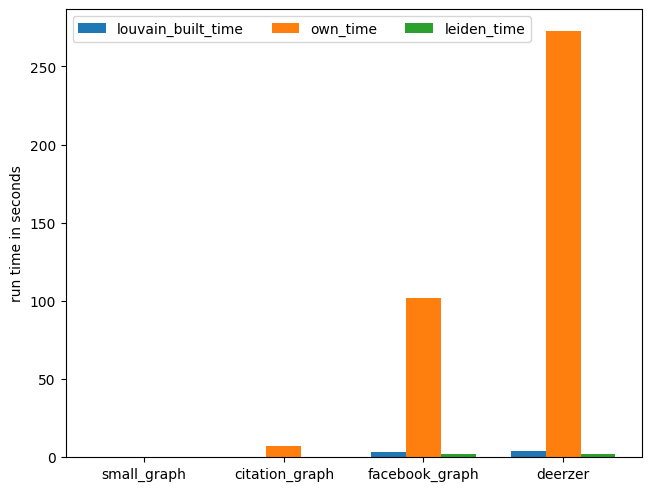

In [111]:
plot_bar('louvain_built_time','own_time','leiden_time','run time in seconds')


Get communities of other graphs

In [122]:
graphs = [small_graph,email_graph,citation_graph,facebook_graph]

In [123]:
#Adding the community id to the graphs as attributes
def add_community_ids(G,node_lists,attribute):
    for i, nodes in enumerate(node_lists):
        for node in nodes:
            # Here you can set any attribute
            G.nodes[node][attribute] = i
    return G

In [124]:
def apply_own(G):
    algo = Louvain_algo.Louvain_algo(G)
    com = algo.run()
    return com
data_dict['num_own']=[]
for G in [small_graph,email_graph,citation_graph]:
    com = apply_own(G)
    data_dict['num_own'].append(len(com))
    G = add_community_ids(G,list(com.values()),'Louvain_id')

In [125]:
def louvain_built(G):
    communities_built = nx.community.louvain_communities(G)
    return communities_built
data_dict['num_built'] = []
for G in [small_graph,email_graph,citation_graph]:
    com = louvain_built(G)
    data_dict['num_built'].append(len(com))
    G = add_community_ids(G,com,'community_id')

In [126]:
def Leiden(G):
    communities_built = nx.community.louvain_communities(G)
    return communities_built
data_dict['num_leiden'] = []
for G in graphs:
    com = Leiden(G)
    data_dict['num_leiden'].append(len(com))
    G = add_community_ids(G,com,'Leiden_id')
data_dict['num_leiden']

[2, 7, 40, 59]

Cutsize

In [127]:
cutsizes = {}
cutsizes['built in'] = np.mean(list(Graph_Exploration.get_cut_sizes(facebook_graph,com_id="community_id").values()))
cutsizes['own Louvain'] = np.mean(list(Graph_Exploration.get_cut_sizes(facebook_graph,com_id="Louvain_id").values()))
cutsizes['Leiden'] = np.mean(list(Graph_Exploration.get_cut_sizes(facebook_graph,com_id="Leiden_id").values()))
cutsizes

{'built in': 694.8666666666667,
 'own Louvain': 638.2424242424242,
 'Leiden': 644.7118644067797}

{47: 5012, 10: 6485, 40: 239, 37: 5979, 33: 2135, 52: 105, 34: 1324, 43: 239, 54: 1068, 15: 137, 20: 3463, 0: 3647, 59: 864, 58: 480, 41: 499, 46: 147, 62: 186, 12: 1241, 11: 474, 63: 384, 36: 656, 28: 275, 35: 823, 25: 679, 4: 30, 32: 978, 19: 1513, 65: 432, 26: 353, 22: 316, 7: 236, 56: 35, 48: 160, 64: 180, 57: 65, 39: 215, 16: 60, 9: 220, 60: 43, 30: 246, 53: 29, 51: 88, 44: 47, 23: 66, 50: 32, 5: 9, 45: 74, 21: 25, 1: 30, 8: 3, 31: 4, 17: 1, 49: 31, 42: 4, 29: 13, 61: 3, 18: 3, 27: 20, 6: 2, 13: 2, 24: 9, 3: 1, 2: 1, 55: 2, 14: 1, 38: 1}


Text(0.5, 1.0, 'Cut size of Louvain communities')

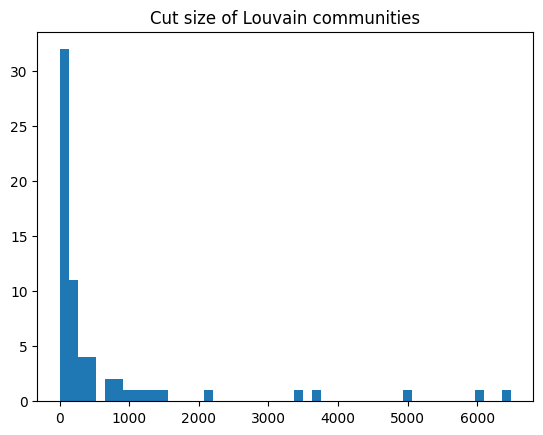

In [128]:
c = Graph_Exploration.get_cut_sizes(facebook_graph,com_id="Louvain_id")
print(c)
plt.hist(c.values(),bins = 50)
plt.title("Cut size of Louvain communities")

In [129]:
cutsize={}
cutsize['built_in'] = []
cutsize['own'] = []
cutsize['Leiden'] = []
for g in graphs:
    cutsize['built_in'].append(np.mean(list(Graph_Exploration.get_cut_sizes(g,com_id="community_id").values())))
    cutsize['own'].append(np.mean(list(Graph_Exploration.get_cut_sizes(g,com_id="Louvain_id").values())))
    cutsize['Leiden'].append(np.mean(list(Graph_Exploration.get_cut_sizes(g,com_id="Leiden_id").values())))
cutsize


{'built_in': [2.0, 1563.0, 72.56410256410257, 694.8666666666667],
 'own': [2.0, 1469.5, 73.45, 638.2424242424242],
 'Leiden': [2.0, 1743.4285714285713, 71.2, 644.7118644067797]}

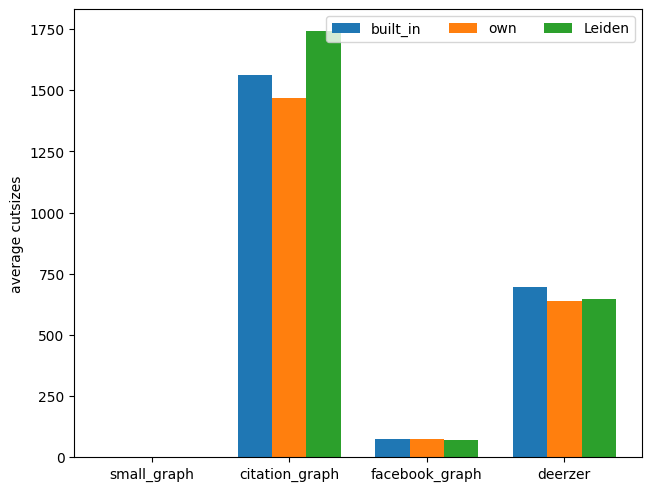

In [130]:
def plot_bar(title):
    fig, ax = plt.subplots(layout='constrained')
    x = np.arange(4)  # the label locations
    width = 0.25  # the width of the bars
    multiplier = 0

    for attribute, measurement in cutsize.items(): 
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute)
        #ax.bar_label(rects, padding=3)
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(title)
    #ax.set_title('Penguin attributes by species')
    ax.set_xticks(x + width, data_dict['names'])
    ax.legend(loc='upper right', ncols=3)
    #ax.set_ylim(0, 200)

    plt.show()
plot_bar('average cutsizes')


In [134]:
data_dict['cut_size_louvain_built'] = [np.mean(list(Graph_Exploration.get_cut_sizes(g,com_id="community_id"))) for g in graphs]
data_dict['cut_size_louvain_built'] 

[0.5, 3.5, 19.0, 30.5]

Modularity

In [135]:

def get_mod(G,c):
    node_list = {}
    for node, val in  nx.get_node_attributes(G,c).items():
        if val in node_list.keys():
            node_list[val].append(node)
        else:
            node_list[val] = [node]
    return nx.community.modularity(G,list(node_list.values()))
modularity = {}
modularity['louvain_built'] = []
modularity['own'] = []
modularity['Leiden'] = []
for g in graphs:
    modularity['louvain_built'].append(get_mod(g,"community_id"))
    modularity['own'].append(get_mod(g,'Louvain_id'))
    modularity['Leiden'].append(get_mod(g,'Leiden_id'))

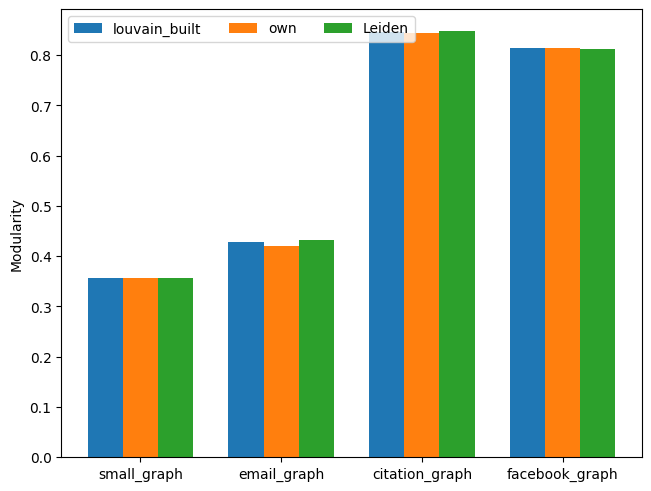

In [152]:
def plot_bar(title):
    fig, ax = plt.subplots(layout='constrained')
    x = np.arange(4)  # the label locations
    width = 0.25  # the width of the bars
    multiplier = 0

    for attribute, measurement in modularity.items(): 
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute)
        #ax.bar_label(rects, padding=3)
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(title)
    #ax.set_title('Penguin attributes by species')
    ax.set_xticks(x + width, ['small_graph','email_graph','citation_graph','facebook_graph'])
    ax.legend(loc='upper left', ncols=3)
    #ax.set_ylim(0, 200)

    plt.show()
plot_bar('Modularity')

Node type analysis

In [138]:
def get_assortativity(G):
    node_list = {}
    for node, val in  nx.get_node_attributes(G,'page_type').items():
        if val in node_list.keys():
            node_list[val].append(node)
        else:
            node_list[val] = [node]
    return nx.community.modularity(G,list(node_list.values()))
get_assortativity(facebook_graph)

0.5246338267609174

In [139]:
def get_random(G):
    node_list = {}
    for node  in  G.nodes():
        val = random.choice(["governement","Tv","company","polititian"])
        if val in node_list.keys():
            node_list[val].append(node)
        else:
            node_list[val] = [node]
    return nx.community.modularity(G,list(node_list.values()))
get_random(facebook_graph)

0.001042445409926887

In [140]:
def get_homogenity(G):
    page_types = {}
    for node, val in  nx.get_node_attributes(G,'page_type').items():
        if val in page_types.keys():
            page_types[val].append(node)
        else:
            page_types[val] = [node]
    communities = {}
    for node, val in  nx.get_node_attributes(G,'Louvain_id').items():
        if val in communities.keys():
            communities[val].append(node)
        else:
            communities[val] = [node]
    page_types = list(nx.get_node_attributes(G,'page_type').values())
    communities = list(nx.get_node_attributes(G,'Louvain_id').values())
    print(page_types)
    print(communities)
    print(completeness_score(page_types, communities))
    return homogeneity_score(page_types,communities)
get_homogenity(facebook_graph)
0.45535623624427823

['tvshow', 'government', 'company', 'government', 'politician', 'politician', 'politician', 'politician', 'government', 'government', 'government', 'politician', 'government', 'government', 'government', 'government', 'company', 'politician', 'government', 'company', 'politician', 'company', 'government', 'company', 'company', 'company', 'government', 'tvshow', 'company', 'company', 'company', 'government', 'government', 'politician', 'politician', 'company', 'company', 'government', 'government', 'government', 'politician', 'government', 'company', 'government', 'tvshow', 'company', 'politician', 'government', 'company', 'company', 'government', 'politician', 'tvshow', 'company', 'government', 'tvshow', 'government', 'company', 'government', 'politician', 'politician', 'company', 'politician', 'company', 'government', 'company', 'company', 'politician', 'tvshow', 'tvshow', 'tvshow', 'politician', 'government', 'politician', 'government', 'government', 'company', 'politician', 'politic

0.45535623624427823

In [141]:
from collections import Counter
def get_dist(G):
    com_0 = [] 
    for node, val in  nx.get_node_attributes(G,'Louvain_id').items():
        if val == 10:
            com_0.append(node)
    features = dict(nx.get_node_attributes(G,'page_type'))
    types = [features[n] for n in com_0]
    frequency = Counter(types)
    print(frequency)
get_dist(facebook_graph)

Counter({'government': 1098, 'company': 38, 'tvshow': 19, 'politician': 12})


Number of communities

In [142]:
def get_len(G,c):
    node_list = {}
    for node, val in  nx.get_node_attributes(G,c).items():
        if val in node_list.keys():
            node_list[val].append(node)
        else:
            node_list[val] = [node]
    return len(list(node_list.values()))
lengths = {}
lengths['louvain_built'] = []
lengths['own'] = []
lengths['Leiden'] = []
for g in graphs:
    lengths['louvain_built'].append(get_len(g,"community_id"))
    lengths['own'].append(get_len(g,'Louvain_id'))
    lengths['Leiden'].append(get_len(g,'Leiden_id'))

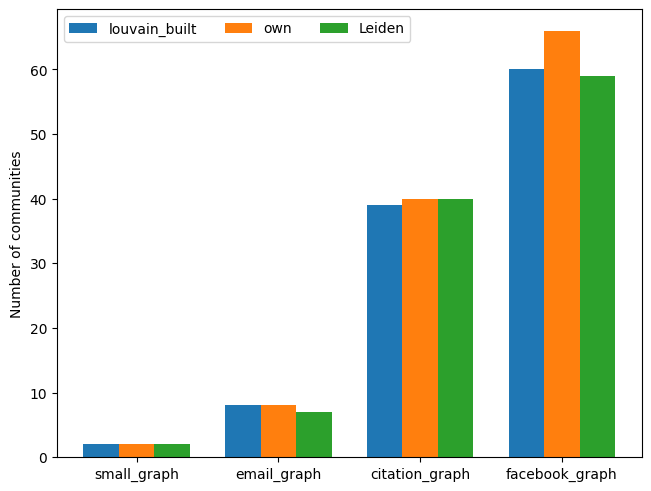

In [145]:
def plot_bar(title):
    fig, ax = plt.subplots(layout='constrained')
    x = np.arange(4)  # the label locations
    width = 0.25  # the width of the bars
    multiplier = 0

    for attribute, measurement in lengths.items(): 
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute)
        #ax.bar_label(rects, padding=3)
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(title)
    #ax.set_title('Penguin attributes by species')
    ax.set_xticks(x + width, ['small_graph','email_graph','citation_graph','facebook_graph'])
    ax.legend(loc='upper left', ncols=3)
    #ax.set_ylim(0, 200)

    plt.show()
plot_bar('Number of communities')

Intra desity

In [148]:
def get_mean_intra_density(G,algo):
    communities = {}
    for node, val in  nx.get_node_attributes(G,algo).items():
        if val in communities.keys():
            communities[val].append(node)
        else:
            communities[val] = [node]
    intra_densities =  []
    for community, nodes in communities.items():
        intra_densities = Graph_Exploration.calculate_intra_density(G, nodes)
    return np.mean(intra_densities)
    

In [149]:
intra = {}
intra['louvain_built'] = []
intra['own'] = []
intra['Leiden'] = []
for g in graphs:
    intra['louvain_built'].append(get_len(g,"community_id"))
    intra['own'].append(get_len(g,'Louvain_id'))
    intra['Leiden'].append(get_len(g,'Leiden_id'))

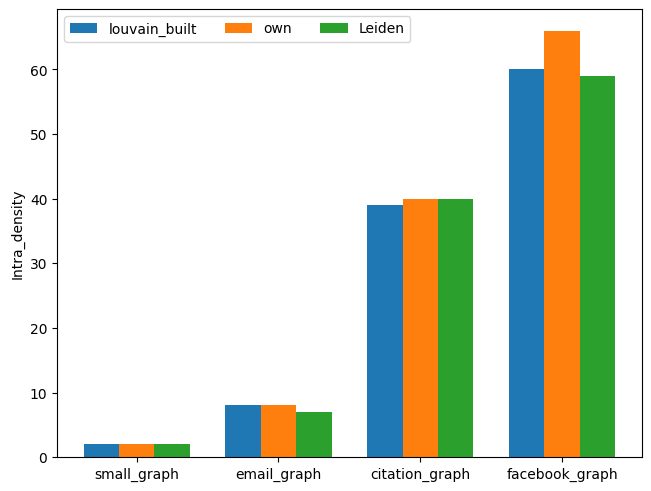

In [151]:
def plot_bar(title):
    fig, ax = plt.subplots(layout='constrained')
    x = np.arange(4)  # the label locations
    width = 0.25  # the width of the bars
    multiplier = 0

    for attribute, measurement in intra.items(): 
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute)
        #ax.bar_label(rects, padding=3)
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(title)
    #ax.set_title('Penguin attributes by species')
    ax.set_xticks(x + width, ['small_graph','email_graph','citation_graph','facebook_graph'])
    ax.legend(loc='upper left', ncols=3)
    #ax.set_ylim(0, 200)

    plt.show()
plot_bar('Intra_density')